Importarea si instalarea librariilor necesare: 

geopandas - faciliteaza lucrul cu date geospatiale

descartes - permite folosirea obiectelor geometrice ca si cai pentru matplotlib

geoplot - geospatial plot

In [ ]:
pip install pandas geopandas descartes geoplot shapely

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import folium
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster
from matplotlib.lines import Line2D

In [72]:
seattle_coord = (47.7511, 120.7401)

df = pd.DataFrame(
    {'City': "seattle",
     'Latitude': [seattle_coord[0]],
     'Longitude': [seattle_coord[1]]
                   })
df.head()

,City,Latitude,Longitude
0,seattle,47.7511,120.7401


Citirea unui fisier de tip shapefile, in care se regasesc date geospatiale despre Statele Unite ale Americii

In [73]:
usa = gpd.read_file("states/states.shp")

In [74]:
usa.head()

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497..."
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
2,Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
3,Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
4,North Dakota,5,38,West North Central,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."


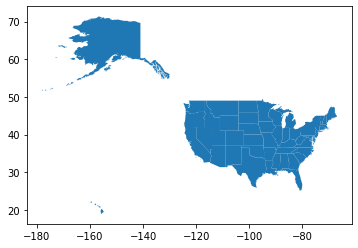

In [35]:
usa.plot()

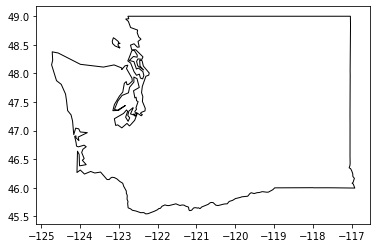

In [36]:
usa[usa.STATE_NAME == "Washington"].plot(color='white', edgecolor="black")

Preluarea bazei de date post-procesata, adaugarea locuintelor pe harta.

In [38]:
houses = pd.read_csv("https://raw.githubusercontent.com/jafetimbre/mib-fiesta/master/data/housing_data_cleaned.csv")

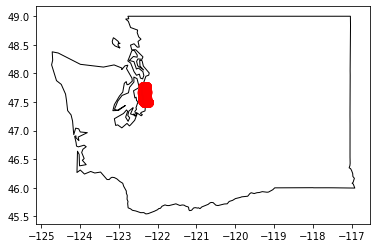

In [39]:
usa[usa.STATE_NAME == "Washington"].plot(color='white', edgecolor="black")
for i, row in houses.iterrows():
   plt.plot(row['long'], row['lat'], marker=".", color='r', markersize=15, alpha=0.25)
plt.show()

Focalizarea (zoom-in) pe Seattle, orasul in care se regasesc locuintele din dataset. Se creeaza un "gradient" in functie de pretul locuintelor, determinat de 6 categorii: "cele mai ieftine", "ieftine", "sub medie", "peste medie", "scumpe", "cele mai scumpe".

numar locuinte: 7981


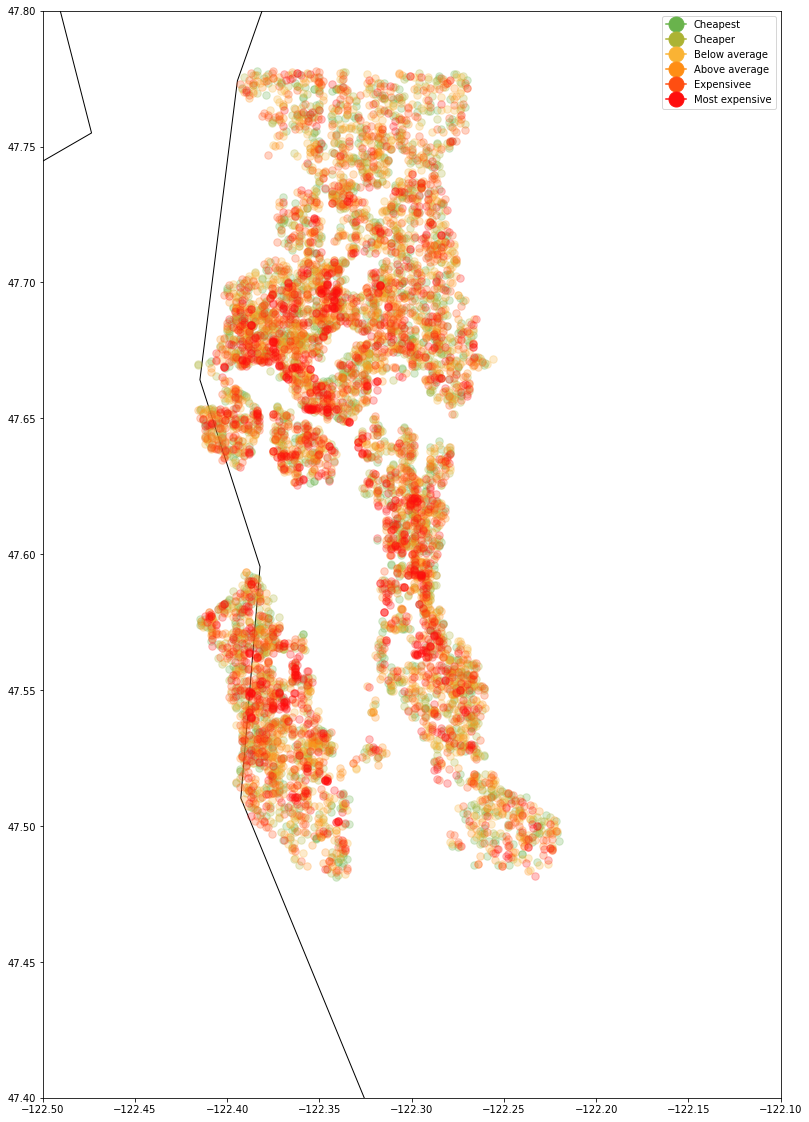

In [70]:
ax = usa[usa.STATE_NAME == "Washington"].plot(color='white', edgecolor="black", figsize=(20,20))
#ax.margins(x=-0.2, y=-0.45)
ax.set_xlim(-122.5, -122.1)
ax.set_ylim(47.4, 47.8)
gradient_arr = ['#69B34C', '#ACB334', '#FAB334', '#FF8E15', '#FF4E11', '#FF0D0D']
houses.sort_values(by=['price'])
row_numbers = len(houses['price'])
print("numar locuinte:", row_numbers)
separator = row_numbers / 6

for i, row in houses.iterrows():
  plt.plot(row['long'], row['lat'], marker=".", color=gradient_arr[int(i/separator)], markersize=15, alpha=0.25)
cheapest_legend = Line2D([0], [0], marker='o', color='#69B34C', label='Cheapest',
                        markerfacecolor='#69B34C', markersize=15)
cheaper_legend = Line2D([0], [0], marker='o', color='#ACB334', label='Cheaper',
                        markerfacecolor='#ACB334', markersize=15)
below_legend = Line2D([0], [0], marker='o', color='#FAB334', label='Below average',
                        markerfacecolor='#FAB334', markersize=15)
above_legend = Line2D([0], [0], marker='o', color='#FF8E15', label='Above average',
                        markerfacecolor='#FF8E15', markersize=15)
expensive_legend = Line2D([0], [0], marker='o', color='#FF4E11', label='Expensivee',
                        markerfacecolor='#FF4E11', markersize=15)
most_exp_legend = Line2D([0], [0], marker='o', color='#FF0D0D', label='Most expensive',
                        markerfacecolor='#FF0D0D', markersize=15)
plt.legend(handles=[cheapest_legend, cheaper_legend, below_legend, above_legend, expensive_legend, most_exp_legend])
plt.show()


Distributia caselor in functie de anul construirii, determinat de 7 categorii: "Inainte de 1950", "1950-1960, "1960-1970", "1970-1980", "1980-1990", "1990-2000", "Dupa 2000"

numar locuinte: 7981


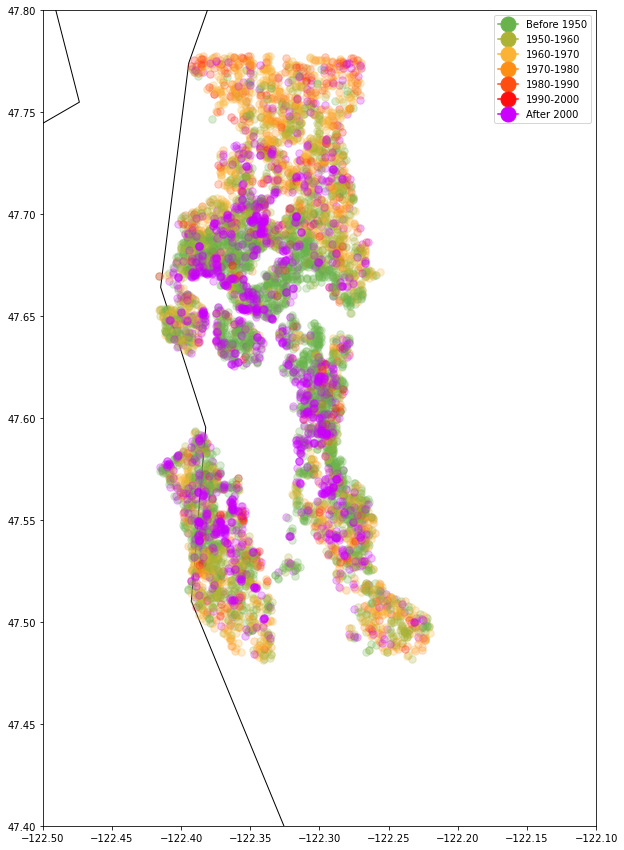

In [76]:
ax = usa[usa.STATE_NAME == "Washington"].plot(color='white', edgecolor="black", figsize=(20,15))
#ax.margins(x=-0.2, y=-0.45)
ax.set_xlim(-122.5, -122.1)
ax.set_ylim(47.4, 47.8)
gradient_arr = ['#69B34C', '#ACB334', '#FAB334', '#FF8E15', '#FF4E11', '#FF0D0D', '#CC00FF']
houses.sort_values(by=['price'])
row_numbers = len(houses['price'])
print("numar locuinte:", row_numbers)
separator = row_numbers / 6

for i, row in houses.iterrows():
  index = 0
  for j in range(1940, 2000, 10):
    if row['yr_built'] >= j:
      index = index + 1
  proper_color = gradient_arr[index]
  plt.plot(row['long'], row['lat'], marker=".", color=proper_color, markersize=15, alpha=0.25)
#plt.legend(['green', 'light green', 'light yellow', 'yellow', 'orange', 'red'], ['cheapest', 'cheaper', 'below average', 'above average', 'expensive', 'the most expensive']);
cheapest_legend = Line2D([0], [0], marker='o', color='#69B34C', label='Before 1950',
                        markerfacecolor='#69B34C', markersize=15)
cheaper_legend = Line2D([0], [0], marker='o', color='#ACB334', label='1950-1960',
                        markerfacecolor='#ACB334', markersize=15)
below_legend = Line2D([0], [0], marker='o', color='#FAB334', label='1960-1970',
                        markerfacecolor='#FAB334', markersize=15)
above_legend = Line2D([0], [0], marker='o', color='#FF8E15', label='1970-1980',
                        markerfacecolor='#FF8E15', markersize=15)
expensive_legend = Line2D([0], [0], marker='o', color='#FF4E11', label='1980-1990',
                        markerfacecolor='#FF4E11', markersize=15)
most_exp_legend = Line2D([0], [0], marker='o', color='#FF0D0D', label='1990-2000',
                        markerfacecolor='#FF0D0D', markersize=15)
last_legend = Line2D([0], [0], marker='o', color='#CC00FF', label='After 2000',
                        markerfacecolor='#CC00FF', markersize=15)
plt.legend(handles=[cheapest_legend, cheaper_legend, below_legend, above_legend, expensive_legend, most_exp_legend, last_legend])
plt.show()

In secventa de cod de mai jos, se vor categoriza locuintele in 3 categorii, evidentiind astfel diferenta in numarul de case construite in fiecare interval.

Numarul de case construite intre 1900 si 1950: 4200
Numarul de case construite intre 1950 si 1990: 2012
Numarul de case construite dupa 1990: 1769


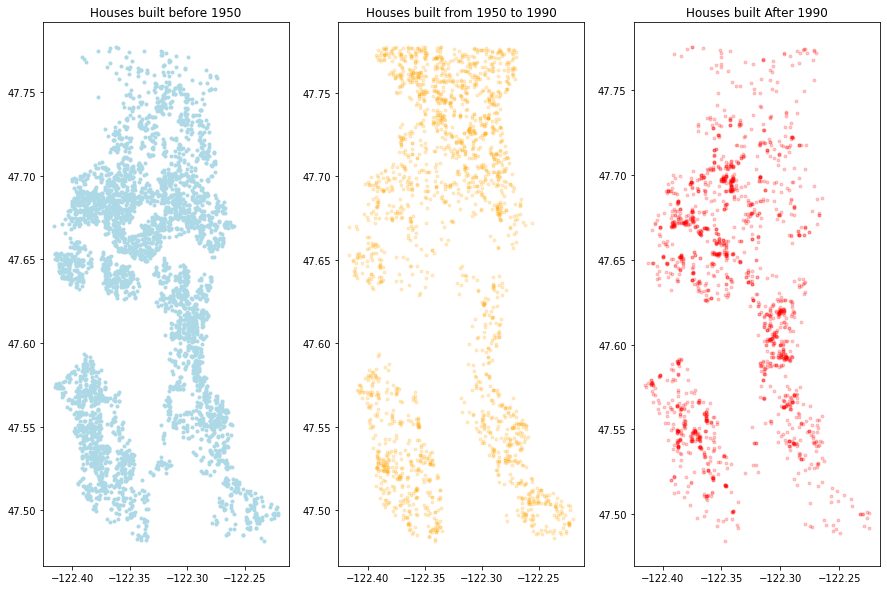

In [77]:
fig = plt.figure(figsize = (15,10))
lat_first = houses.loc[houses['yr_built'] <= 1950].lat
long_first = houses.loc[houses['yr_built'] <= 1950].long

lat_second = houses.loc[(houses['yr_built'] <= 1990) & (houses['yr_built'] > 1950)].lat
long_second = houses.loc[(houses['yr_built'] > 1950) & (houses['yr_built'] <= 1990)].long

lat_third = houses.loc[houses['yr_built'] > 1990].lat
long_third = houses.loc[houses['yr_built'] > 1990].long
print("Numarul de case construite intre 1900 si 1950:", len(lat_first))
print("Numarul de case construite intre 1950 si 1990:", len(lat_second))
print("Numarul de case construite dupa 1990:", len(lat_third))

ax2 = fig.add_subplot(131)
plt.scatter(long_first, lat_first, label = '<1950', color='lightblue', marker='.')
plt.title('Houses built before 1950')

ax3 = fig.add_subplot(132)
plt.scatter(long_second, lat_second, label = '1950-1990', color='orange', marker='.', alpha=0.2)
plt.title('Houses built from 1950 to 1990')

ax4 = fig.add_subplot(133)
plt.scatter(long_third, lat_third, label = '>1990', color='red', marker='.', alpha=0.2)
plt.title('Houses built after 1990')
plt.show()


Pentru urmatoarea secventa de cod, s-a folosit libraria Folium, care are scopul de manipulare a datelor si afisarea lor pe harta Leaflet. Din motive de performanta, s-a ales afisarea primelor 500 de case.

In [52]:
seattle_map = folium.Map(location=[47.656, -122.4],
                        zoom_start=12,
                        tiles='openstreetmap')
for i, row in houses.head(500).iterrows(): 
  lat = row['lat']
  long = row['long']
  mark = folium.Marker([lat, long]).add_to(seattle_map)
seattle_map

In harta de mai jos, se pot observa locuintele cu vedere la apa, avand ca pop-up pretul fiecarei case.

In [53]:
waterfront_houses = houses.loc[houses['waterfront'] == 1]
seattle_map = folium.Map(location=[47.656, -122.4],
                        zoom_start=12,
                        tiles='Stamen Toner')
for i, row in waterfront_houses.iterrows(): 
  lat = row['lat']
  long = row['long']
  popup_text = f"Price: {row['price']}"
  popup = folium.Popup(popup_text, parse_html=True)
  mark = folium.Marker([lat, long], popup=popup).add_to(seattle_map)
seattle_map

2015